# CS 273P | Homework 5
Shefali Gupta | 57806943

In [39]:
import numpy as np
np.random.seed(0)
import mltools as ml
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Problem 1 :

In [40]:
import mltools.cluster as clust
#reload(clust);

In [41]:
iris=np.genfromtxt("data/iris.txt",delimiter=None)
Y=iris[:,-1]
X=iris[:,0:2] # (148,2)

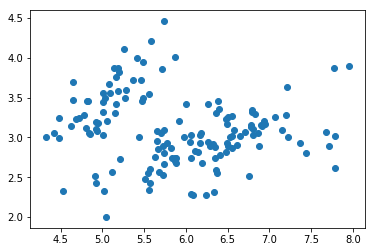

The figure shows approximately 4 clusters


In [42]:
plt.figure()
plt.scatter(X[:,0],X[:,1])
plt.show()
print("The figure shows approximately 4 clusters")

Problem 1 b:

0 23.438643757297644
1 25.403909282771348
2 24.32039355047388
3 21.66938725646046
4 20.856963620246418
5 26.655013472609337
6 25.671305957870096
7 24.32039355047388
8 20.867217448173573
9 21.474609331235506


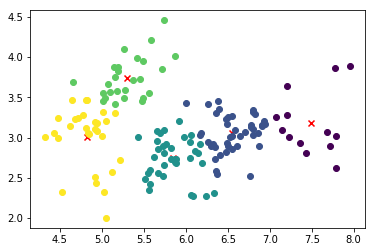

In [43]:
# k-means
# k=5
ssd=np.inf
for i in range(10):
    Zi,mui,ssdi=clust.kmeans(X,K=5,init='random')
    print(i,ssdi)
    if ssdi<ssd:
        Z,mu,ssd=Zi,mui,ssdi
#Now,plot the data and their cluster ID as color:
ml.plotClassify2D(None,X,Z)
plt.scatter(mu[:,0],mu[:,1],c='r',marker='x')

0 4.8001479642817255
1 4.49904759523533
2 4.936736713021152
3 5.248772814771274
4 5.701485748609772
5 5.395255830956612
6 5.442582698020821
7 5.994015256416024
8 6.018268730030417
9 4.571853233395967


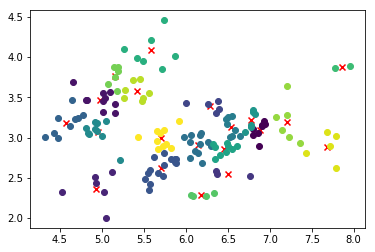

In [44]:
# k=20
ssd=np.inf
for i in range(10):
    Zi,mui,ssdi=clust.kmeans(X,K=20,init='random')
    print(i,ssdi)
    if ssdi<ssd:
        Z,mu,ssd=Zi,mui,ssdi
#Now,plot the data and their cluster ID as color:
ml.plotClassify2D(None,X,Z)
plt.scatter(mu[:,0],mu[:,1],c='r',marker='x')

Problem 1 c : Agglomerative clustering

Single linkage, K=5


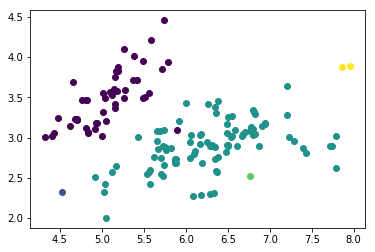

Single linkage, K=20


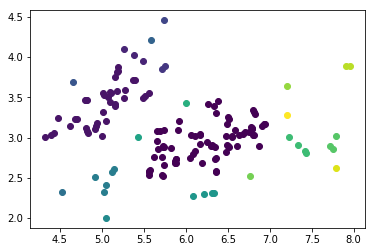

Complete linkage, K=5


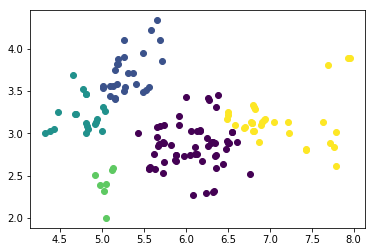

Complete linkage, K=20


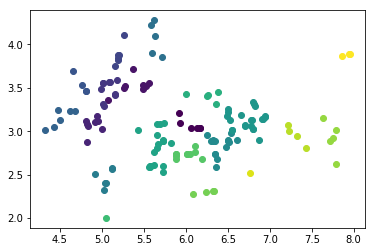

In [45]:
Z,dend=clust.agglomerative(X,K=5,method='min')
plt.figure()
print("Single linkage, K=5")
ml.plotClassify2D(None,X,Z)
plt.show()

Z,dend=clust.agglomerative(X,K=20,method='min')
plt.figure()
print("Single linkage, K=20")
ml.plotClassify2D(None,X,Z)
plt.show()

Z,dend=clust.agglomerative(X,K=5,method='max')
plt.figure()
print("Complete linkage, K=5")
ml.plotClassify2D(None,X,Z)
plt.show()

Z,dend=clust.agglomerative(X,K=20,method='max')
plt.figure()
print("Complete linkage, K=20")
ml.plotClassify2D(None,X,Z)
plt.show()

K-means works well when the shape of clusters are hyper-spherical. Agglomerative clustering builds clusters incrementally.

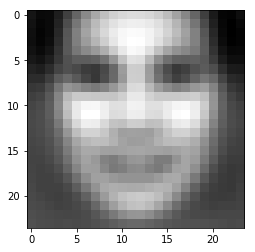

In [46]:
X=np.genfromtxt("data/faces.txt",delimiter=None)
mu=X.mean(axis=0,keepdims=True)
X0=X-mu
plt.figure()
img=np.reshape(mu,(24,24))
plt.imshow(img.T,cmap="gray")

2 b and c:

In [47]:
import scipy.linalg
U,S,V=scipy.linalg.svd(X0,False)
W=U.dot(np.diag(S));
print(W.shape,V.shape)

(4916, 576) (576, 576)


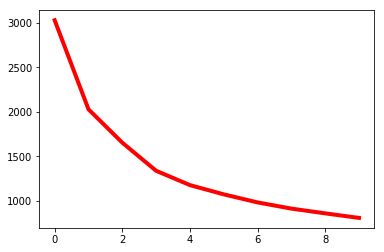

In [48]:
err=[None]*10
for k in range(10):
    Xhat0=W[:,:k].dot(V[:k,:])
    err[k]=((X0-Xhat0)**2).mean()
plt.plot(range(10),err,'r-',linewidth=4);


2c : First 3 principal dimensions of data:

<Figure size 432x288 with 0 Axes>

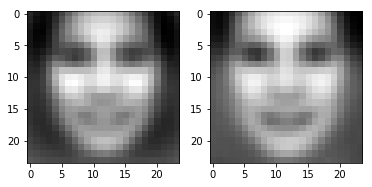

<Figure size 432x288 with 0 Axes>

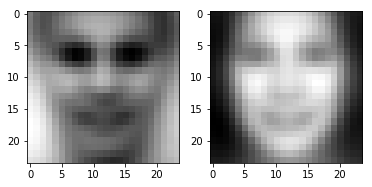

<Figure size 432x288 with 0 Axes>

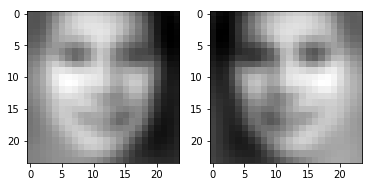

In [49]:
for k in range(3):
    alpha=2*np.median(np.abs(W[:,k]));
    im1=np.reshape(mu+alpha*V[k,:],(24,24));
    im2=np.reshape(mu-alpha*V[k,:],(24,24));
    plt.figure();
    f,(ax1,ax2)=plt.subplots(1,2);
    ax1.imshow(im1.T,cmap="gray");
    ax2.imshow(im2.T,cmap="gray");

2e: Reconstruct 2 faces using first K principal directions

<Figure size 432x288 with 0 Axes>

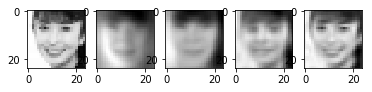

<Figure size 432x288 with 0 Axes>

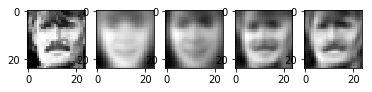

In [50]:
for i in [24,25]:
    im=X[i,:];
    im=np.reshape(im,(24,24));
    plt.figure()
    f,ax=plt.subplots(1,5);
    ax[0].imshow(im.T,cmap="gray");
    for j,k in enumerate([5,10,50,100]):
        im=mu+W[i,0:k].dot(V[0:k,:]);
        im=np.reshape(im,(24,24));
        ax[j+1].imshow(im.T,cmap="gray");  

2f:

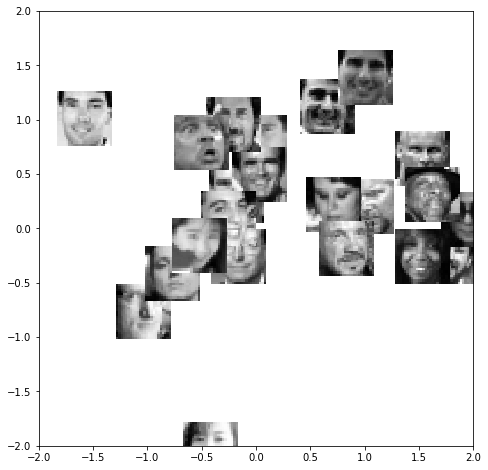

In [51]:
import mltools.transforms
idx=np.floor(4916*np.random.rand(25));
idx=idx.astype('int')
plt.rcParams['figure.figsize']=(8.0,8.0)
coord,params=ml.transforms.rescale(W[:,0:2])
for i in idx:
    loc = (coord[i,0],coord[i,0]+0.5, coord[i,1],coord[i,1]+0.5)
    img = np.reshape( X[i,:], (24,24) ) # reshape to square
    plt.imshow( img.T , cmap="gray", extent=loc ) # draw each image
    plt.axis( (-2,2,-2,2) )